In [5]:
from google.colab import files
uploaded = files.upload()


Saving titanic.csv (1).zip to titanic.csv (1) (1).zip


In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv (1) (1).zip')


In [7]:
import pandas as pd
import numpy as np


In [9]:
# Show the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Basic info: types, nulls, memory
df.info()

# Shape of the dataset
print("\nShape of the dataset:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Shape of the dataset: (891, 12)


In [11]:
# Summary statistics for numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Describe all object (categorical/text) columns
df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
# Mean, median, and std of Age
print("Age - Mean:", df['Age'].mean())
print("Age - Median:", df['Age'].median())
print("Age - Std Dev:", df['Age'].std())

# Fare statistics
print("\nFare - Mean:", df['Fare'].mean())
print("Fare - Median:", df['Fare'].median())
print("Fare - Std Dev:", df['Fare'].std())


Age - Mean: 29.69911764705882
Age - Median: 28.0
Age - Std Dev: 14.526497332334044

Fare - Mean: 32.204207968574636
Fare - Median: 14.4542
Fare - Std Dev: 49.693428597180905


In [14]:
# Skewness shows asymmetry of distribution
print("\nSkewness of numeric features:")
print(df.skew(numeric_only=True))

# Kurtosis shows how peaked or flat distributions are
print("\nKurtosis of numeric features:")
print(df.kurt(numeric_only=True))



Skewness of numeric features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Kurtosis of numeric features:
PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64


In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_cols)


Numeric Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


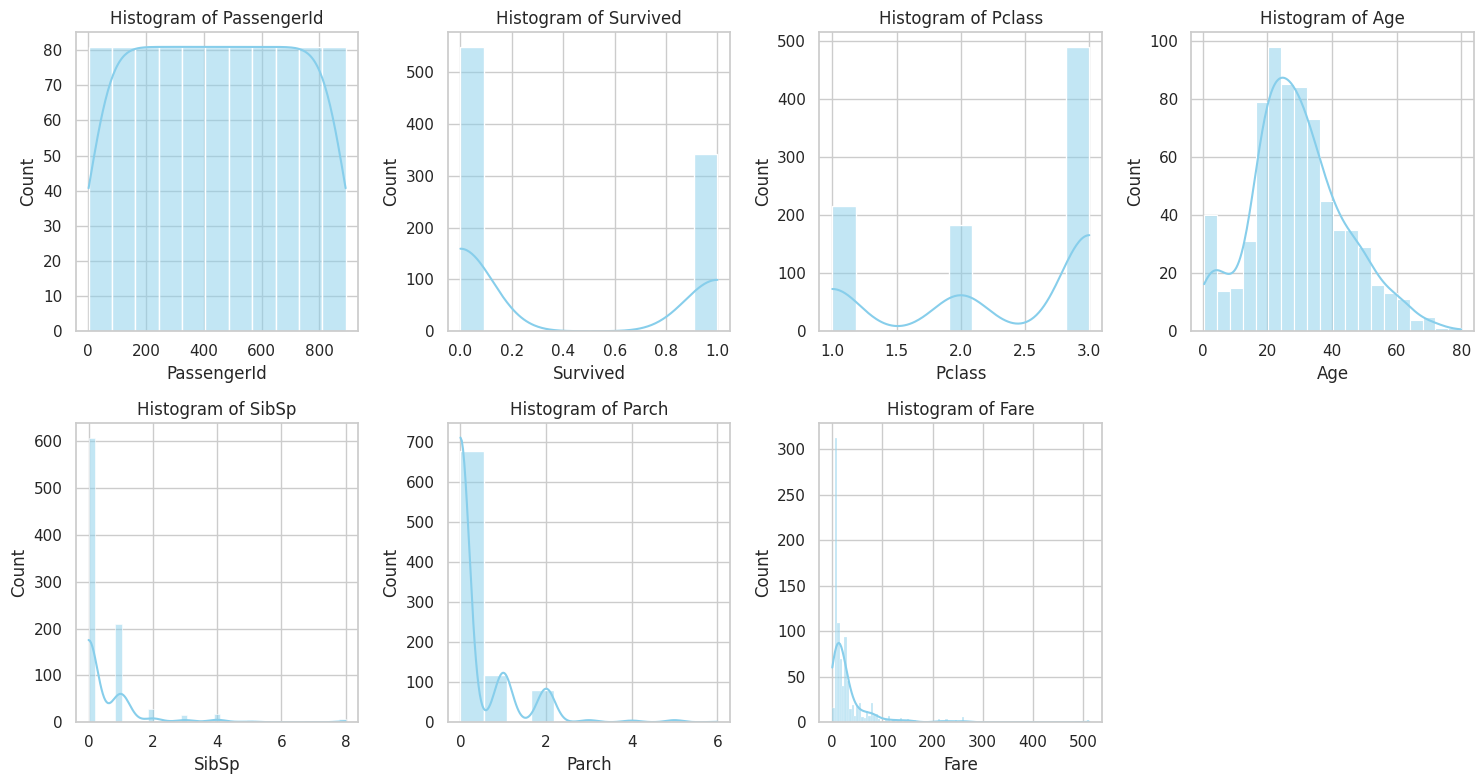

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, (len(numeric_cols)+1)//2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


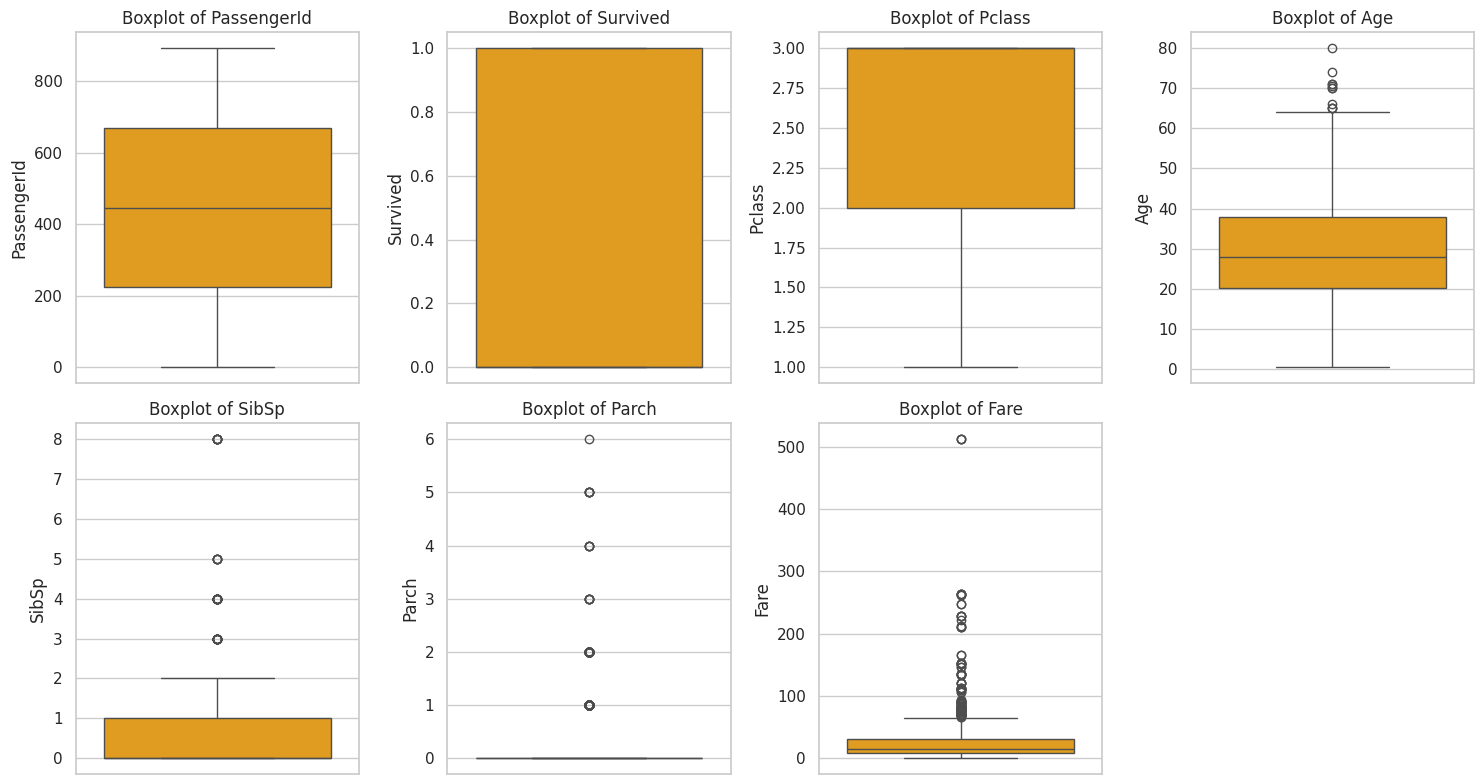

In [17]:
# Plot boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, (len(numeric_cols)+1)//2, i + 1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


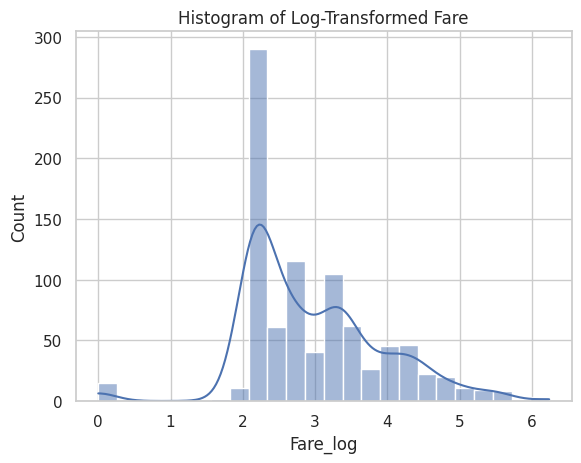

In [18]:
import numpy as np
df['Fare_log'] = np.log1p(df['Fare'])  # log(1 + x) to handle zero values
sns.histplot(df['Fare_log'], kde=True)
plt.title("Histogram of Log-Transformed Fare")
plt.show()


In [19]:
df[['Survived', 'Pclass', 'Sex', 'Embarked']].nunique()


,0
Survived,2
Pclass,3
Sex,2
Embarked,3


/tmp/ipython-input-20-2597006547.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


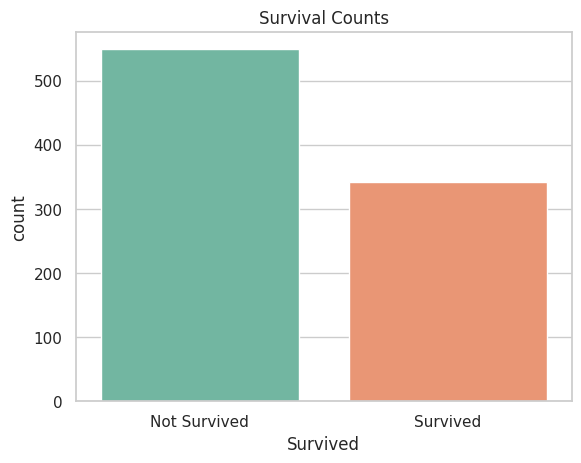

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count of survived vs not survived
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title("Survival Counts")
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()


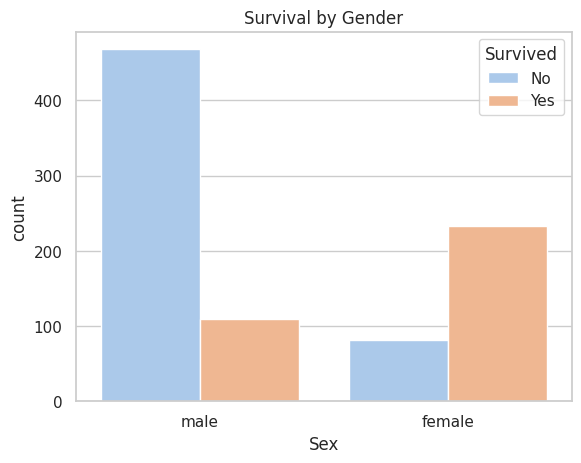

In [21]:
# Countplot of Survived by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Survival by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


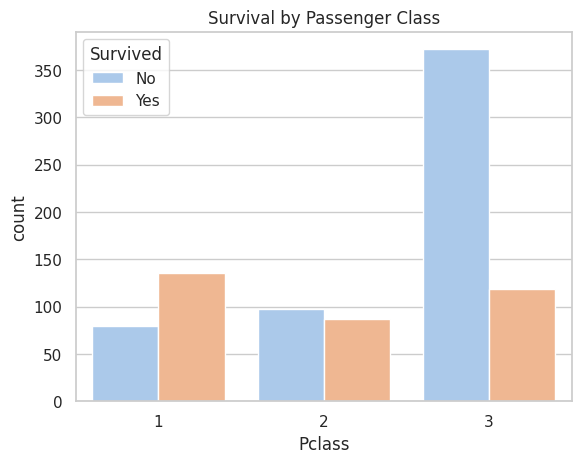

In [22]:
# Countplot of Survived by Passenger Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


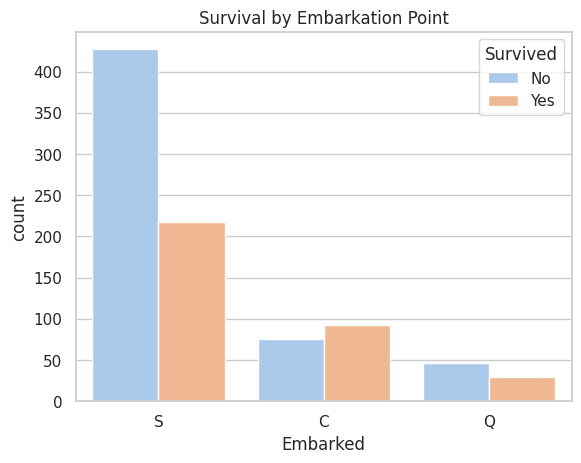

In [23]:
# Countplot of Survived by Embarked
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')
plt.title("Survival by Embarkation Point")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


/tmp/ipython-input-24-3147361361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')


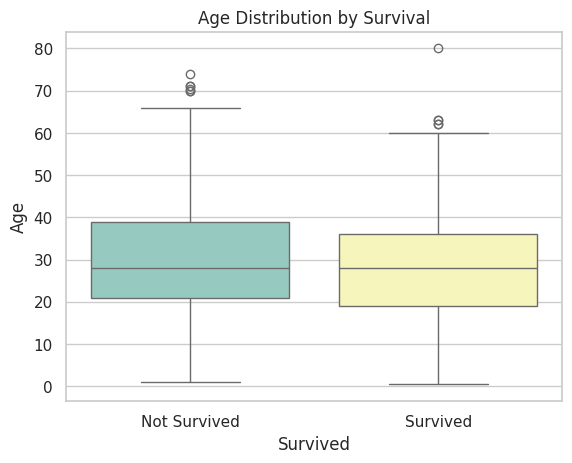

In [24]:
# Age distribution by survival status
sns.boxplot(data=df, x='Survived', y='Age', palette='Set3')
plt.title("Age Distribution by Survival")
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()


/tmp/ipython-input-25-460628647.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Fare', palette='cool')


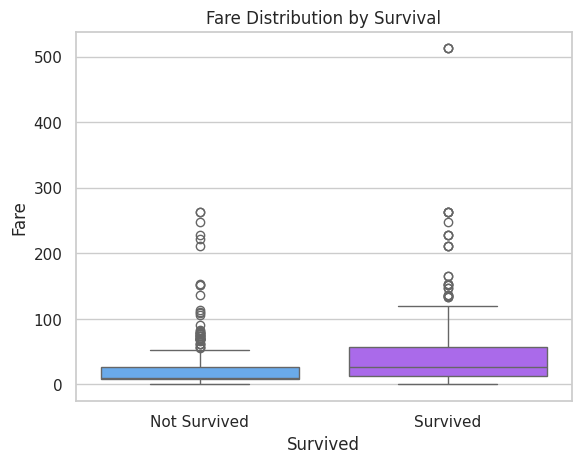

In [25]:
# Fare distribution by survival status
sns.boxplot(data=df, x='Survived', y='Fare', palette='cool')
plt.title("Fare Distribution by Survival")
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()


In [26]:
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# View the selected columns
numeric_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Fare_log'],
      dtype='object')

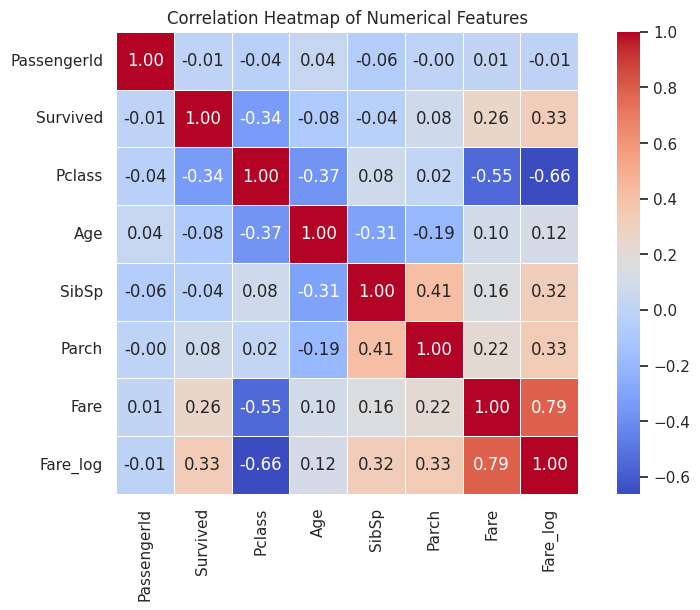

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


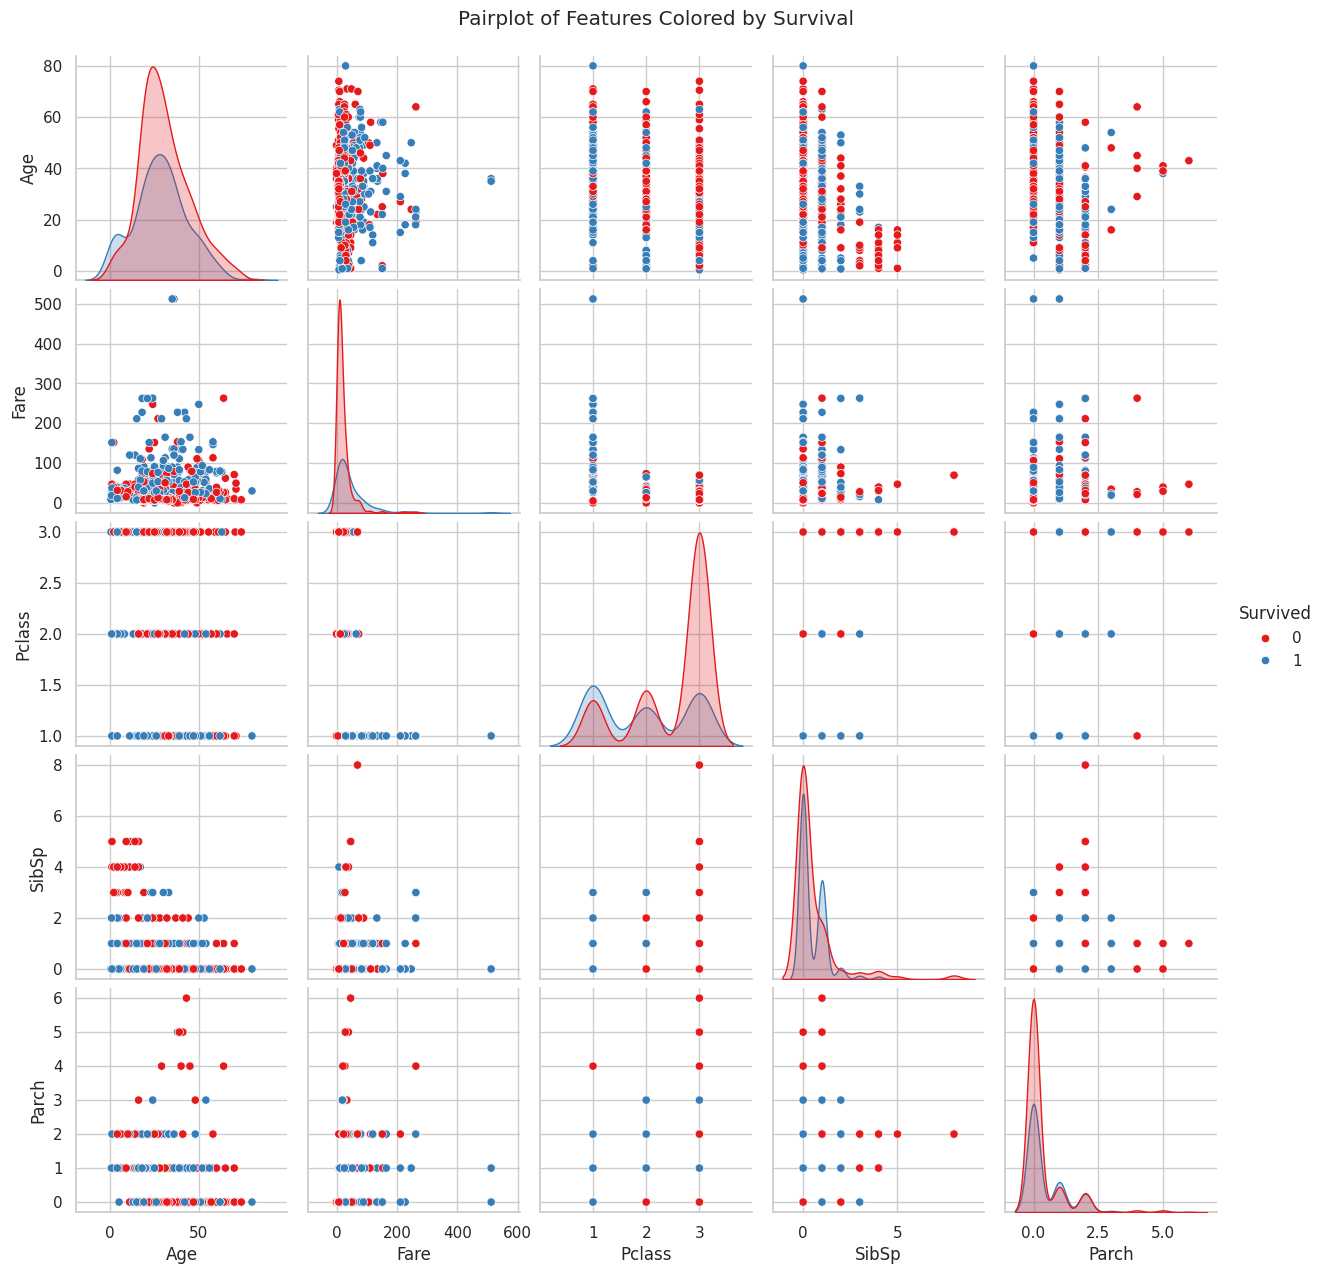

In [29]:
# Use pairplot to visualize pairwise relationships
# We'll sample a subset to avoid overplotting
sns.pairplot(df, vars=["Age", "Fare", "Pclass", "SibSp", "Parch"], hue="Survived", palette='Set1')
plt.suptitle("Pairplot of Features Colored by Survival", y=1.02)
plt.show()


/tmp/ipython-input-30-2434124544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_sex, x='Sex', y='Survived', palette='Set2')


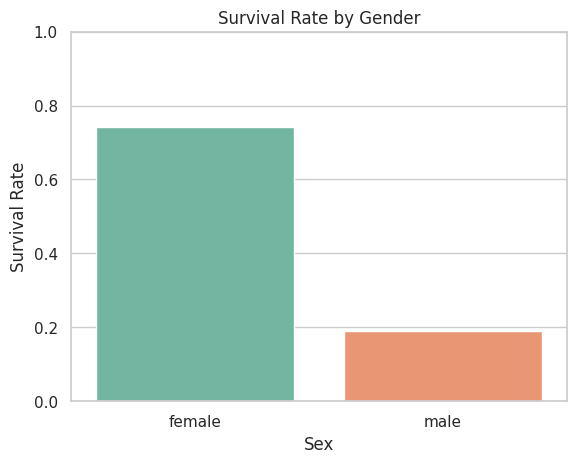

In [30]:
# Grouping survival by Sex
survival_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()

sns.barplot(data=survival_by_sex, x='Sex', y='Survived', palette='Set2')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


/tmp/ipython-input-31-2256985338.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_class, x='Pclass', y='Survived', palette='coolwarm')


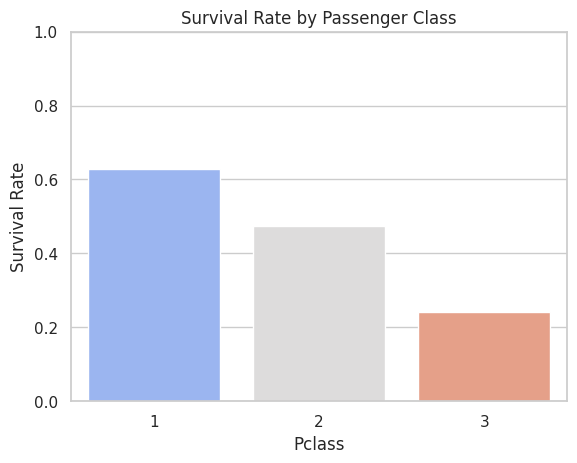

In [31]:
# Group survival by Pclass
survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()

sns.barplot(data=survival_by_class, x='Pclass', y='Survived', palette='coolwarm')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


In [32]:
# Display top 5 rows with highest fares
df.sort_values(by='Fare', ascending=False)[['Fare', 'Survived', 'Pclass', 'Name']].head()


,Fare,Survived,Pclass,Name
679,512.3292,1,1,"Cardeza, Mr. Thomas Drake Martinez"
258,512.3292,1,1,"Ward, Miss. Anna"
737,512.3292,1,1,"Lesurer, Mr. Gustave J"
88,263.0000,1,1,"Fortune, Miss. Mabel Helen"
438,263.0000,0,1,"Fortune, Mr. Mark"


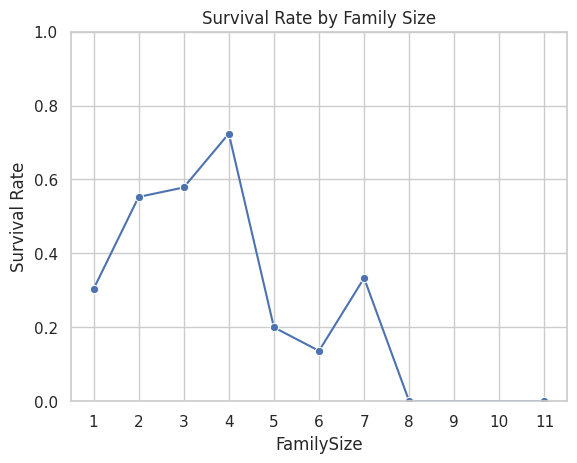

In [33]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival rate by Family Size
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

sns.lineplot(data=family_survival, x='FamilySize', y='Survived', marker='o')
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xticks(range(1, df['FamilySize'].max() + 1))
plt.ylim(0, 1)
plt.grid(True)
plt.show()


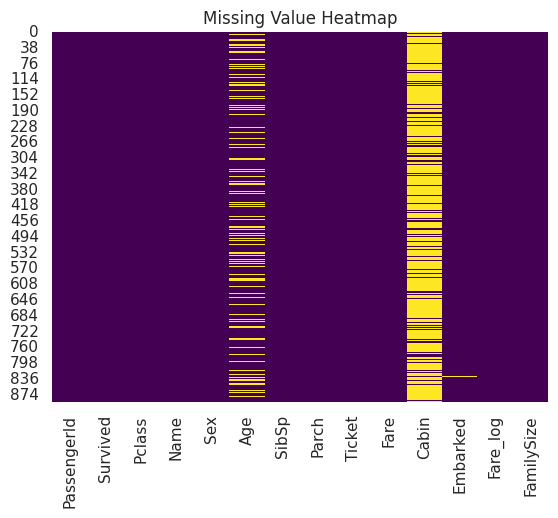

In [34]:
# If you haven't handled all missing values yet
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()


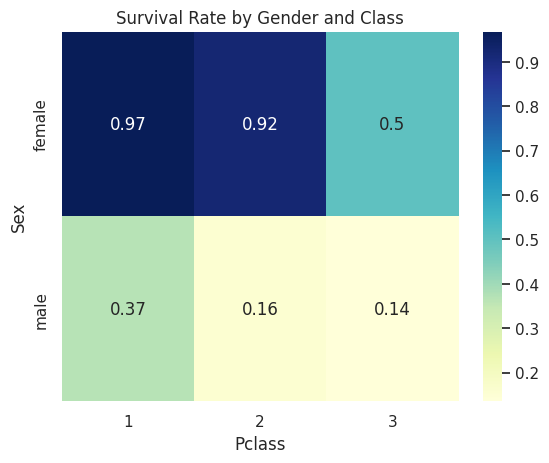

In [35]:
# Survival rate by Sex and Pclass together
grouped = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

# Heatmap of this grouped info
sns.heatmap(grouped, annot=True, cmap='YlGnBu')
plt.title("Survival Rate by Gender and Class")
plt.ylabel("Sex")
plt.xlabel("Pclass")
plt.show()


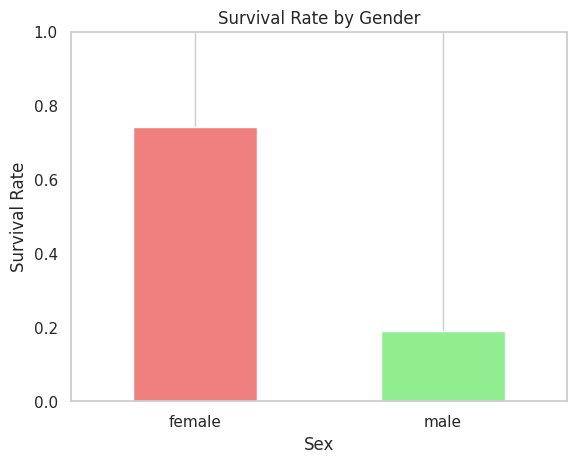

In [36]:
# Gender-based survival rate
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


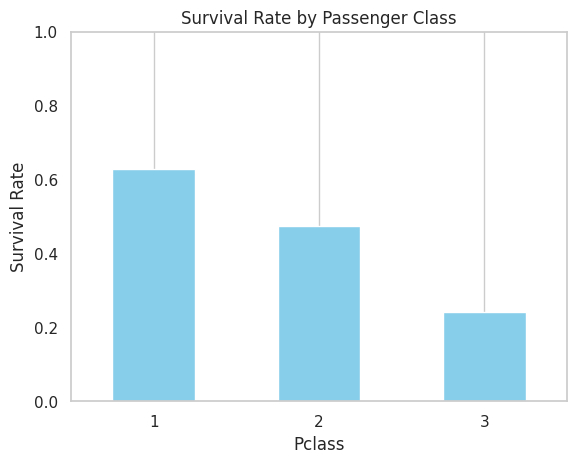

In [37]:
# Pclass-based survival rate
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


/tmp/ipython-input-38-4212121177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FareBand', y='Survived', palette='YlOrBr')


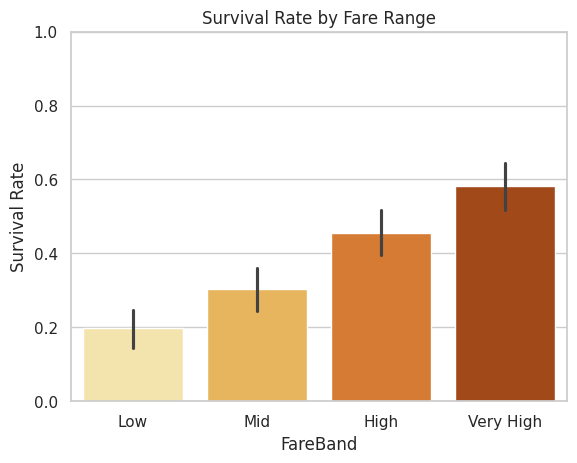

In [38]:
# Fare bins and survival
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=["Low", "Mid", "High", "Very High"])

# Plot survival rate by FareBand
sns.barplot(data=df, x='FareBand', y='Survived', palette='YlOrBr')
plt.title("Survival Rate by Fare Range")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


/tmp/ipython-input-39-1139631083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set3')


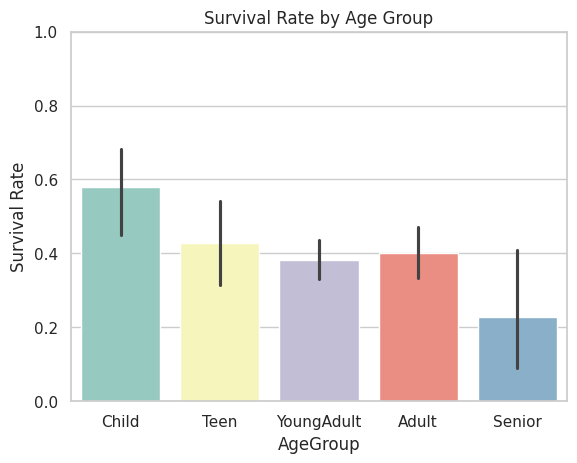

In [39]:
# Create Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Survival rate by AgeGroup
sns.barplot(data=df, x='AgeGroup', y='Survived', palette='Set3')
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


/tmp/ipython-input-40-1135378664.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FamilyType', y='Survived', palette='viridis')


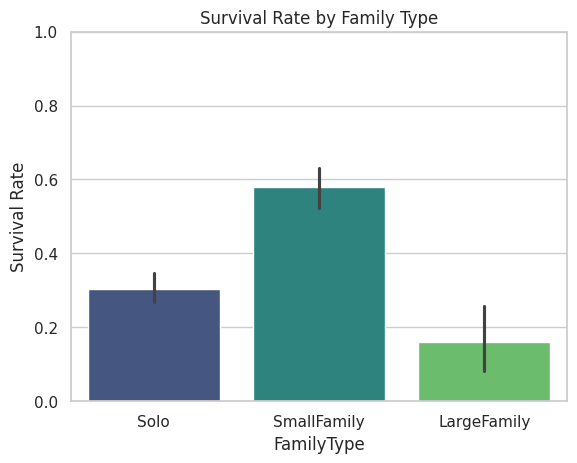

In [40]:
# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Bin Family Size
df['FamilyType'] = pd.cut(df['FamilySize'], bins=[0,1,4,11], labels=['Solo', 'SmallFamily', 'LargeFamily'])

# Survival by FamilyType
sns.barplot(data=df, x='FamilyType', y='Survived', palette='viridis')
plt.title("Survival Rate by Family Type")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()
